In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

In [42]:
warnings.filterwarnings('ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
%matplotlib inline

In [43]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
data_dict = pd.read_csv('data/data_dictionary.csv')

In [50]:
# Filter rows where BMI is above 40
high_bmi_rows = train[train['Physical-BMI'] < 14]
print("Number of rows with BMI above 40:", len(high_bmi_rows))
selected_columns = high_bmi_rows[['Basic_Demos-Age', 'Physical-Height', 'Physical-Weight', 'Physical-BMI']]

# Print the filtered rows
print(high_bmi_rows)

Number of rows with BMI above 40: 121
            id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
34    01e9a5c0                    Spring                7                0   
71    0441d6af                    Winter                5                1   
135   0745c390                    Winter               10                0   
156   0928b047                    Summer               11                1   
204   0b7c6100                      Fall               11                1   
...        ...                       ...              ...              ...   
3925  fd0d9bca                      Fall                8                1   
3931  fdb7da3c                      Fall                9                0   
3941  fe5e2dc9                    Spring                7                0   
3954  ff759544                    Summer                7                1   
3958  ffed1dd5                    Spring               13                0   

     CGAS-Season  CGAS-CG

In [4]:
display(train.head())
print(f"Train shape: {train.shape}")

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Train shape: (3960, 82)


In [5]:
set_difference = set(train.columns) - set(test.columns)
print(set_difference)

{'PCIAT-PCIAT_Total', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_07', 'PCIAT-Season', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_09', 'sii', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_04'}


In [6]:
# Define columns related to PCIAT
PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]

# Function to recalculate the SII score
def recalculate_sii(row):
    """
    Recalculate the SII score based on the PCIAT total and missing values.
    Returns a categorical value (0-3) based on thresholds.
    """
    if pd.isna(row['PCIAT-PCIAT_Total']):  # Handle missing totals
        return np.nan
    max_possible = row['PCIAT-PCIAT_Total'] + row[PCIAT_cols].isna().sum() * 5
    if row['PCIAT-PCIAT_Total'] <= 30 and max_possible <= 30:
        return 0
    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_possible <= 49:
        return 1
    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_possible <= 79:
        return 2
    elif row['PCIAT-PCIAT_Total'] >= 80 and max_possible >= 80:
        return 3
    return np.nan

# Apply the recalculation to the training dataset
train['recalc_sii'] = train.apply(recalculate_sii, axis=1)

In [7]:
mismatch_rows = train[
    (train['recalc_sii'] != train['sii']) & train['sii'].notna()
]

mismatch_rows[PCIAT_cols + [
    'PCIAT-PCIAT_Total', 'sii', 'recalc_sii'
]].style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,sii,recalc_sii
24,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,nan,2.000000,30.000000,0.000000,nan
93,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,nan
104,5.000000,2.000000,4.000000,2.000000,nan,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,45.000000,1.000000,nan
141,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,nan,0.000000,2.000000,0.000000,26.000000,0.000000,nan
142,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,26.000000,0.000000,nan
270,3.000000,3.000000,4.000000,2.000000,4.000000,2.000000,1.000000,3.000000,2.000000,2.000000,4.000000,0.000000,2.000000,1.000000,4.000000,nan,2.000000,3.000000,4.000000,2.000000,48.000000,1.000000,nan
368,2.000000,3.000000,4.000000,2.000000,5.000000,1.000000,2.000000,nan,nan,nan,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,nan,nan,31.000000,1.000000,nan
592,3.000000,0.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,nan,nan,1.000000,2.000000,1.000000,1.000000,0.000000,21.000000,0.000000,nan
724,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,nan,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,29.000000,0.000000,nan
877,5.000000,5.000000,5.000000,4.000000,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,4.000000,nan,4.000000,5.000000,5.000000,1.000000,5.000000,0.000000,5.000000,5.000000,78.000000,2.000000,nan


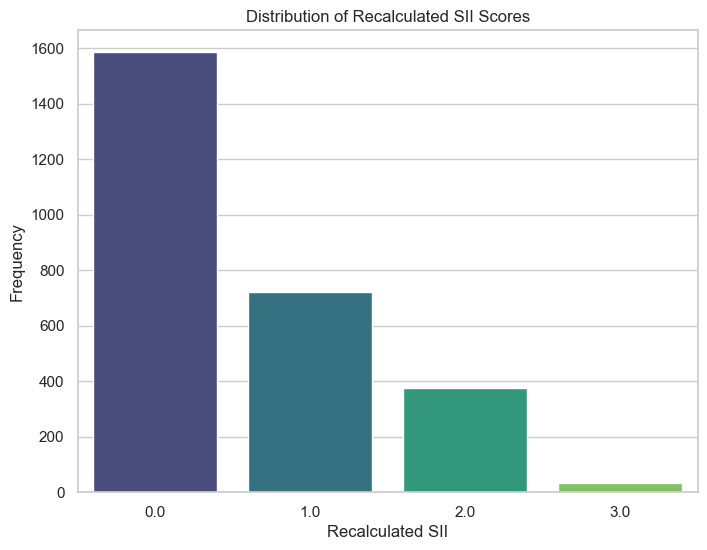

In [8]:
# Explore the distribution of recalculated SII scores
plt.figure(figsize=(8, 6))
sns.countplot(x='recalc_sii', data=train, palette='viridis')
plt.title('Distribution of Recalculated SII Scores')
plt.xlabel('Recalculated SII')
plt.ylabel('Frequency')
plt.show()

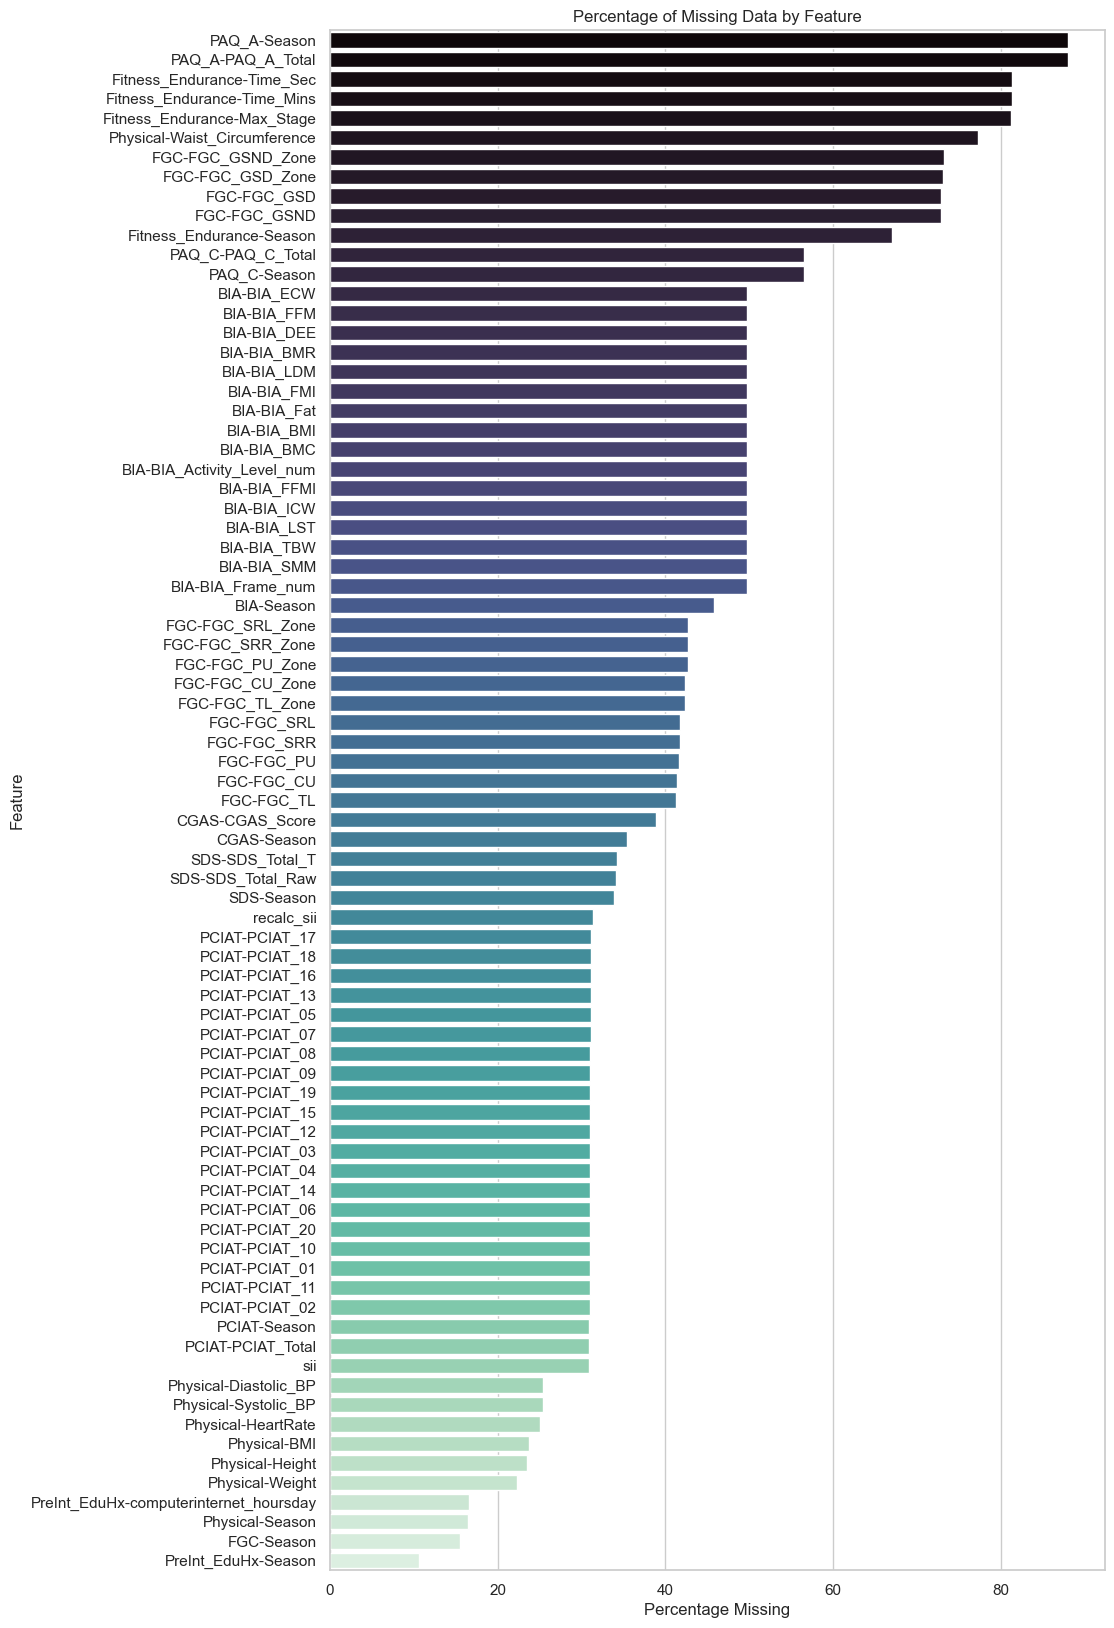

In [9]:
# Investigate missing data
missing_values = train.isna().mean().sort_values(ascending=False) * 100
missing_values = missing_values[missing_values > 0]  # Filter only columns with missing data

# Visualize missing data
plt.figure(figsize=(10, 20))
sns.barplot(x=missing_values.values, y=missing_values.index, palette='mako')
plt.title('Percentage of Missing Data by Feature')
plt.xlabel('Percentage Missing')
plt.ylabel('Feature')
plt.show()

In [10]:
# Check correlation of PCIAT columns to PCIAT total
correlations = train[PCIAT_cols + ['PCIAT-PCIAT_Total']].corr()['PCIAT-PCIAT_Total'].sort_values(ascending=False)

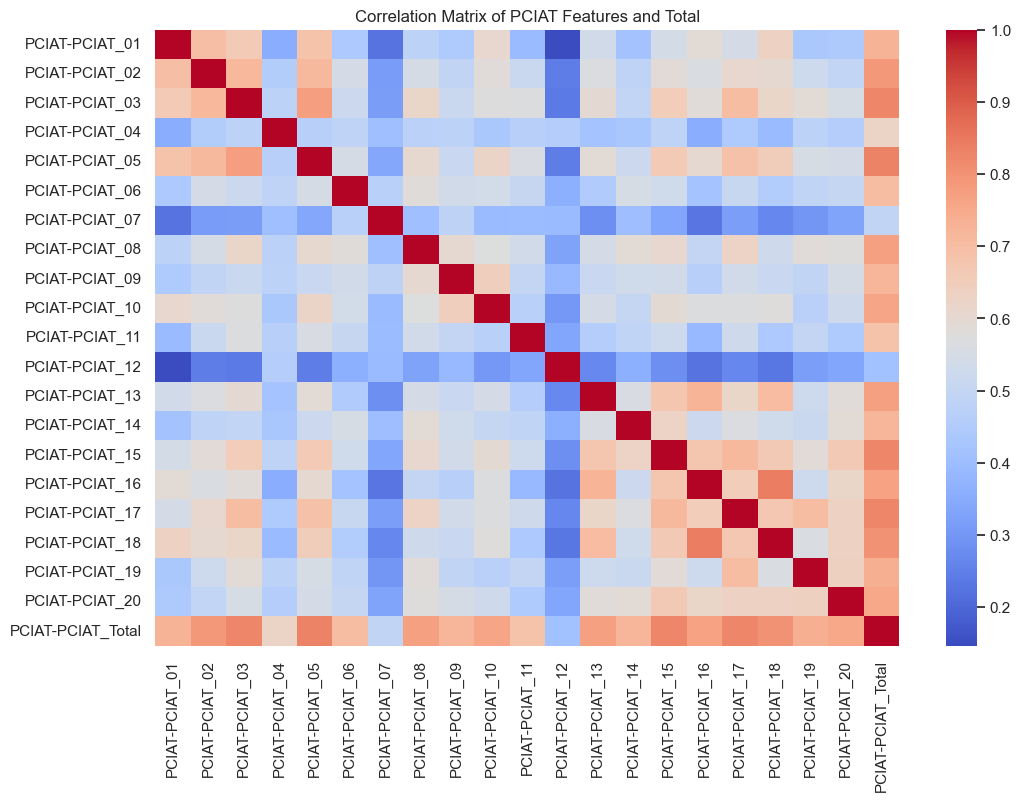

In [11]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train[PCIAT_cols + ['PCIAT-PCIAT_Total']].corr(), cmap='coolwarm', annot=False, cbar=True)
plt.title('Correlation Matrix of PCIAT Features and Total')
plt.show()

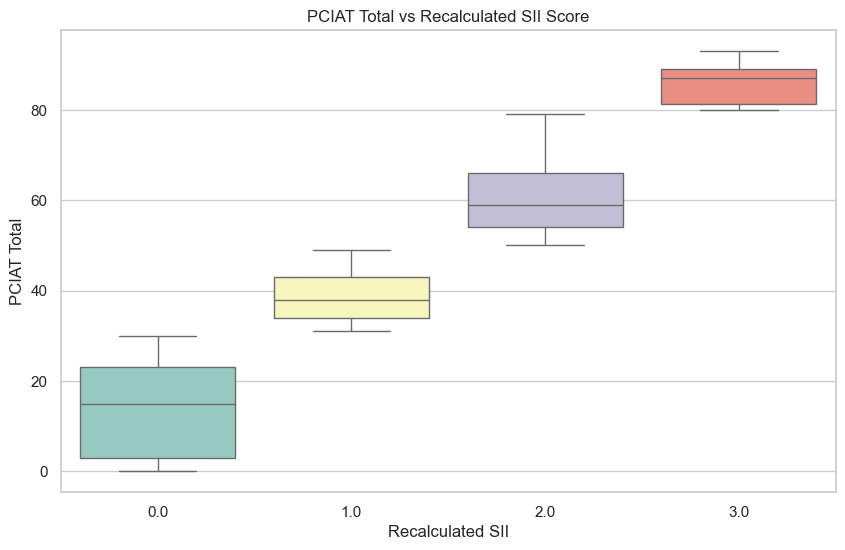

In [12]:
# Visualize the relationship between recalc_sii and PCIAT_Total
plt.figure(figsize=(10, 6))
sns.boxplot(x='recalc_sii', y='PCIAT-PCIAT_Total', data=train, palette='Set3')
plt.title('PCIAT Total vs Recalculated SII Score')
plt.xlabel('Recalculated SII')
plt.ylabel('PCIAT Total')
plt.show()

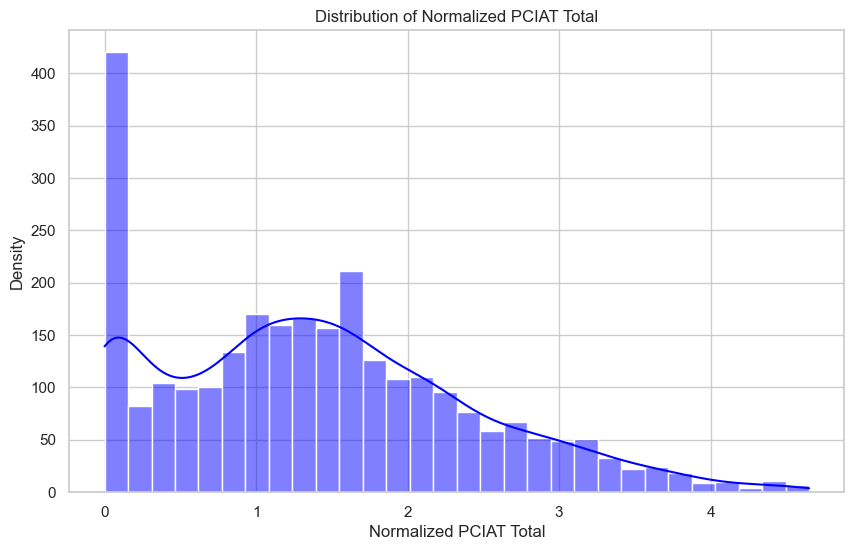

In [13]:
# Feature engineering example: Add a normalized score for PCIAT-PCIAT_Total
train['PCIAT_normalized'] = train['PCIAT-PCIAT_Total'] / train[PCIAT_cols].notna().sum(axis=1)

# Visualize the normalized scores
plt.figure(figsize=(10, 6))
sns.histplot(train['PCIAT_normalized'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribution of Normalized PCIAT Total')
plt.xlabel('Normalized PCIAT Total')
plt.ylabel('Density')
plt.show()

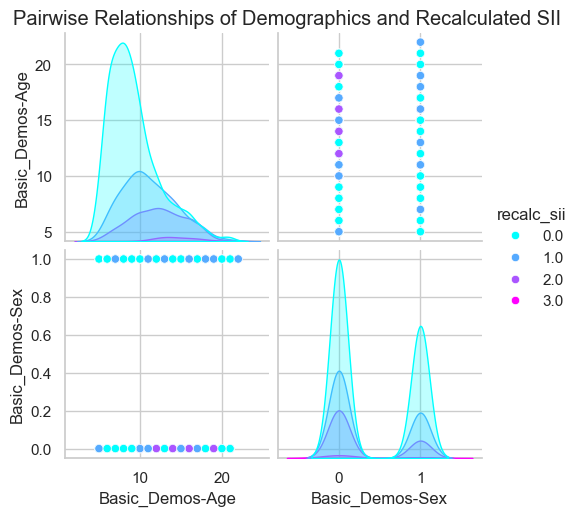

In [14]:
# Investigate relationships between demographics and recalculated SII
demographic_cols = ['Basic_Demos-Age', 'Basic_Demos-Sex']  # Replace with actual demographic columns

# Pairwise plots for demographics and recalculated SII
sns.pairplot(train, vars=demographic_cols, hue='recalc_sii', palette='cool', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Demographics and Recalculated SII', y=1.02)
plt.show()

In [15]:
train = train.dropna(subset =["recalc_sii"])

In [16]:
train['sii'] = train['recalc_sii']
train['complete_resp_total'] = train['PCIAT-PCIAT_Total'].where(
    train[PCIAT_cols].notna().all(axis=1), np.nan
)

train.drop(columns='recalc_sii', inplace=True)

In [17]:
train = train.dropna(subset =['complete_resp_total'])

In [18]:
train.shape

(2671, 84)

In [19]:
train['complete_resp_total'].isna().sum()

0

In [20]:
test.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [21]:
# Identify extra columns in the training set
extra_columns = list(set(train.columns) - set(test.columns))
extra_columns.remove('sii')
extra_columns.remove('complete_resp_total')

train = train.drop(columns=extra_columns)

In [22]:
train.to_csv('data/cleaned_train.csv', index=False)

In [23]:
X_train = train.drop(columns=['sii', 'complete_resp_total', 'id'])
y_train = train['complete_resp_total']
X_train.describe

<bound method NDFrame.describe of      Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex CGAS-Season  \
0                         Fall                5                0      Winter   
1                       Summer                9                0         NaN   
2                       Summer               10                1        Fall   
3                       Winter                9                0        Fall   
5                       Spring               13                1      Winter   
...                        ...              ...              ...         ...   
3953                      Fall                8                0         NaN   
3954                    Summer                7                1         NaN   
3955                      Fall               13                0      Spring   
3957                      Fall               11                0      Spring   
3958                    Spring               13                0      Spring   

     

In [24]:
!pip install catboost

In [25]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

categorical_features = [
    'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season','FGC-Season', 'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season',
    'PreInt_EduHx-Season', 'SDS-Season',
    'Basic_Demos-Sex',
    'FGC-FGC_CU_Zone',
    'FGC-FGC_GSND_Zone',
    'FGC-FGC_GSD_Zone',
    'FGC-FGC_PU_Zone',
    'FGC-FGC_SRL_Zone',
    'FGC-FGC_SRR_Zone',
    'FGC-FGC_TL_Zone',
    'BIA-BIA_Activity_Level_num',
    'BIA-BIA_Frame_num',
    'PreInt_EduHx-computerinternet_hoursday'
]

X_train[categorical_features] = X_train[categorical_features].astype(str)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create CatBoost Pool for better handling of categorical features
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_features)

In [26]:
# Initialize CatBoostRegressor
model = CatBoostRegressor(
    iterations=500,       # Number of boosting iterations
    learning_rate=0.1,    # Step size for weight updates
    depth=6,              # Depth of the trees
    loss_function='RMSE', # Regression problem
    verbose=50            # Print training progress every 50 iterations
)

# Train the model
model.fit(train_pool)

# Predict on the test set
y_pred = model.predict(test_pool)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

0:	learn: 19.7985079	total: 165ms	remaining: 1m 22s
50:	learn: 15.6159681	total: 2.22s	remaining: 19.5s
100:	learn: 14.7539104	total: 4.53s	remaining: 17.9s
150:	learn: 13.9306819	total: 6.95s	remaining: 16.1s
200:	learn: 13.1570539	total: 9.27s	remaining: 13.8s
250:	learn: 12.4083915	total: 11.4s	remaining: 11.3s
300:	learn: 11.7161988	total: 14s	remaining: 9.28s
350:	learn: 11.1020605	total: 16.4s	remaining: 6.98s
400:	learn: 10.5473920	total: 19s	remaining: 4.69s
450:	learn: 10.0996468	total: 21.4s	remaining: 2.33s
499:	learn: 9.6152441	total: 23.9s	remaining: 0us
Root Mean Squared Error: 17.148989548219884


In [27]:
test[categorical_features] = test[categorical_features].astype(str)

# Prepare the test Pool
test_pool = Pool(test.drop(columns=['id']), cat_features=categorical_features)

# Predict the target values
predicted_scores = model.predict(test_pool)

# Create a DataFrame with id and predicted score
results_df = pd.DataFrame({
    'id': test['id'],  # Include the ID column
    'predicted_score': predicted_scores  # Add the predicted scores
})

results_df.head()

,id,predicted_score
0,00008ff9,37.306520
1,000fd460,14.419475
2,00105258,29.982345
3,00115b9f,22.639660
4,0016bb22,33.839251


In [28]:
# Define the function to calculate SII index
def calculate_sii(predicted_score):
    if pd.isna(predicted_score):  # Handle missing values
        return np.nan
    rounded_score = round(predicted_score)  # Round the predicted score to an integer
    if rounded_score <= 30:
        return 0
    elif 31 <= rounded_score <= 49:
        return 1
    elif 50 <= rounded_score <= 79:
        return 2
    elif rounded_score >= 80:
        return 3
    return np.nan  # Default fallback, though this shouldn't happen
# Apply the function to the predicted_score column
results_df['sii'] = results_df['predicted_score'].apply(calculate_sii)
results_df = results_df.drop(columns='predicted_score')
# Save or display the results
results_df.to_csv('submission_test.csv', index=False)
print(results_df)

          id  sii
0   00008ff9    1
1   000fd460    0
2   00105258    0
3   00115b9f    0
4   0016bb22    1
5   001f3379    0
6   0038ba98    0
7   0068a485    0
8   0069fbed    1
9   0083e397    1
10  0087dd65    0
11  00abe655    0
12  00ae59c9    1
13  00af6387    0
14  00bd4359    1
15  00c0cd71    1
16  00d56d4b    0
17  00d9913d    0
18  00e6167c    0
19  00ebc35d    1
